In [205]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.contrib.distributions import Bernoulli
import os
from PIL import Image
import keras
import keras.backend as K
import random
# class VariationalDense:
#     """Variational Dense Layer Class"""
#     def __init__(self, n_in, n_out, model_prob, model_lam):
#         self.model_prob = model_prob
#         self.model_lam = model_lam
#         self.model_bern = Bernoulli(probs=self.model_prob, dtype=tf.float32)
#         self.model_M = tf.Variable(tf.truncated_normal([n_in, n_out], stddev=0.01))
#         self.model_m = tf.Variable(tf.zeros([n_out]))
#         self.model_W = tf.matmul(
#             tf.diag(self.model_bern.sample((n_in, ))), self.model_M
#         )

#     def __call__(self, X, activation=tf.identity):
#         output = activation(tf.matmul(X, self.model_W) + self.model_m)
#         if self.model_M.shape[1] == 1:
#             output = tf.squeeze(output)
#         return output

#     @property
#     def regularization(self):
#         return self.model_lam * (
#             self.model_prob * tf.reduce_sum(tf.square(self.model_M)) +
#             tf.reduce_sum(tf.square(self.model_m))
#         )

# Created sample data.
# n_samples = 20
# X = np.random.normal(size=(n_samples, 1))
# y = np.random.normal(np.cos(5.*X) / (np.abs(X) + 1.), 0.1).ravel()
# X_pred = np.atleast_2d(np.linspace(-3., 3., num=100)).T
# X = np.hstack((X, X**2, X**3))
# X_pred = np.hstack((X_pred, X_pred**2, X_pred**3))




In [134]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0


In [122]:
model = None
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(512, activation=tf.nn.relu),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(10, activation=tf.nn.softmax)
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

# model.__dict__

Epoch 1/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.4414 - acc: 0.8619
Epoch 2/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.2641 - acc: 0.9174
Epoch 3/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.2276 - acc: 0.9285
Epoch 4/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.2079 - acc: 0.9353
Epoch 5/5
10000/10000 [==============================] - 0s 47us/step


[0.08337370197735727, 0.9728]

In [126]:
f = K.function([model.layers[0].input, K.learning_phase()],
               [model.layers[-1].output])

def predict_with_uncertainty(f, x, no_classes = 10, n_iter=100):
    result = np.zeros((n_iter,) + (x.shape[0], no_classes) )

    for i in range(n_iter):
        result[i,:, :] = f((x, 1))[0]

    prediction = result.mean(axis=0)
    uncertainty = result.std(axis=0)
    return prediction, uncertainty    

# from https://stackoverflow.com/questions/44971349/how-to-turn-off-dropout-for-testing-in-tensorflow/44971517

In [132]:

# np.shape(uncertainty)

In [124]:
def imshow(image):
    image = image 
#     plt.imshow(img, )  # convert from Tensor image    
    plt.imshow(image, cmap='gray')  

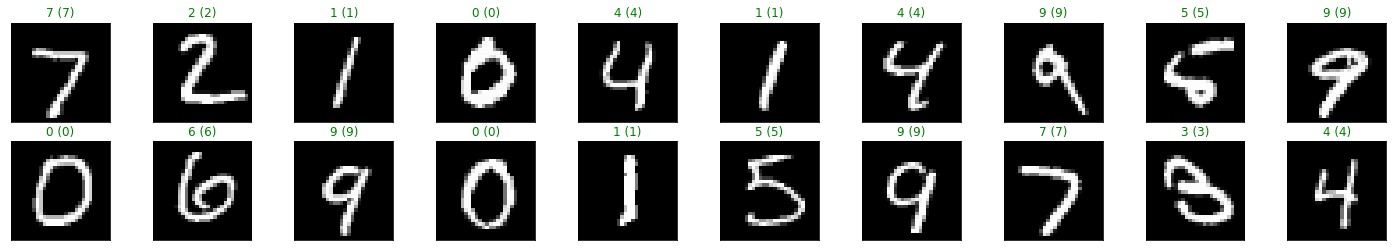

In [152]:
fig = plt.figure(figsize=(25, 4))
predict, uncertainty = predict_with_uncertainty(f, x_test[:20])

preds = [np.where(x == np.amax(x))[0][0] for x in predict]

for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(x_test[idx])
#     actual = y_test[index]
    ax.set_title("{} ({})".format(preds[idx], y_test[idx]), color=("green" if preds[idx]==y_test[idx] else "red"))

In [233]:
# predict, uncertainty = predict_with_uncertainty(f, np.array([x_test[0]]))
# imshow(x_test[0])
# for i in range(10):
#     print("label:" , i, "prob:", predict[0][i], "uncertainty:", uncertainty[0][i])

In [232]:
# image = np.random.random((28,28))
# label = np.random.randint(0,10, (1,))
# print(np.shape(image), np.shape(label))

# predict, uncertainty = predict_with_uncertainty(f, np.array([image]))

# imshow(image)
# for i in range(10):
#     print("label:" , i, "prob:", predict[0][i], "uncertainty:", uncertainty[0][i])
    
# print("predicted:", np.argmax(predict[0]), "; value: ", predict[0][np.argmax(predict[0])], "; uncertainty: ", uncertainty[0][np.argmax(predict[0])] )


In [231]:
# # images_random = np.rand(100,28,28)
# # labels_random = np.randint(0,10, (100,))
# images_random = np.random.random((20,28,28))
# labels_random = np.random.randint(0,10, (20,))
# # print(np.shape(images_random), np.shape(labels_random))

# fig = plt.figure(figsize=(25, 4))
# predict, uncertainty = predict_with_uncertainty(f, images_random)

# # preds = [np.where(x == np.amax(x))[0][0] for x in predict]


# for idx in np.arange(20):
#     ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
#     pred = np.argmax(predict[idx])
# #     print(pred)
#     unc = uncertainty[idx][pred]
#     if unc > 0.2:
#         label = "uncertain"
#     else:
#         label = pred
#     imshow(images_random[idx])
#     ax.set_title("{} ".format(label))
# #     ax.set_title("{} ".format(np.argmax(predict[idx]), images_random[idx]), color=("green" if preds[idx]==labels_random[idx] else "red"))

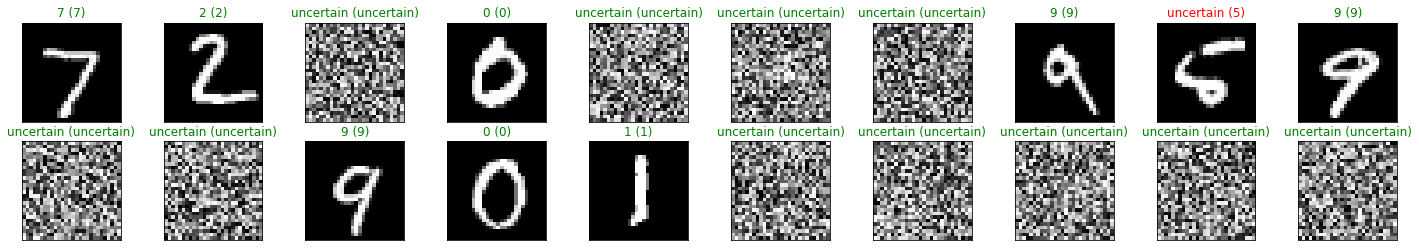

In [230]:
images = []
labels = []

for i in range(20):
    if bool(random.getrandbits(1)):
        images.append(np.random.random((28,28)))
        labels.append("uncertain")
    else:
        images.append(x_test[i])
        labels.append(y_test[i])

images = np.asarray(images)
labels = np.asarray(labels)
# print(np.shape(images), np.shape(labels))
predict, uncertainty = predict_with_uncertainty(f, images)
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    pred = np.argmax(predict[idx])

    unc = uncertainty[idx][pred]
    if unc > 0.2:
        label = "uncertain"
    else:
        label = pred
    imshow(images[idx])
#     ax.set_title("{} ".format(label))
    ax.set_title("{} ({})".format(label, labels[idx]), color=("green" if labels[idx]==str(label) else "red"))